#### Importar librerías 

In [1]:
from sympy import * 
init_printing(use_latex=True)
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import matplotlib.animation as animation


## Análisis de la interacción de dos especies mediante ODE

### Sistema de ecuaciones lineales 

Se empezará realizando el análisis de un modelo en que dos especies se relacionan de forma lineal, de tal manera que la variación de una de ellas está relacionada proporcionalmente con el número elementos de esta que existen y también con el número de elementos de la otra, las ecuacuiones son las siguientes:


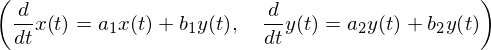

In [2]:
x= Function("x",real=True)
y= Function("y",real=True)
a1,a2,b1,b2,t=symbols("a1 a2 b1 b2 t",real=True)
eq = (Eq(Derivative(x(t),t),a1*x(t)+b1*y(t)), Eq(Derivative(y(t),t),a2*y(t)+b2*y(t)))
eq

En donde las constantes $a_1$, $b_1$, $a_2$ y $b_2$ indican la forma en la que se llevará a cabo la interacción, para explicar esto utilizaremos la especie $x$, para el parametro $a_1$ en este caso, un número positivo de $a_1$ indica que a medida que existen más elementos de $x$, $x$ va a crecer más rápido, un número negativo para $a_1$ indica que a medida que crece el número de elementos de $x$, $x$ va a decrecer más rápido. Y de igual forma para el parámetro $b_1$ solo que en este caso para la relación es con el numero de elementos de la especie $y$.

Ahora miraremos un ejemplo concreto, en el que las variables $a_1$, $b_1$, $a_2$ y $b_2$ tendran valores especificos que indican un comportamiento de las especies, para el caso $a_1=0.013$, $b_1=-0.008$,$a_2=0.013$ y $b_2=-0.007$


#### Solución simbólica

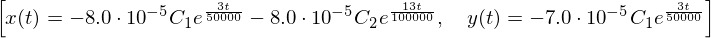

In [3]:
eq = (Eq(Derivative(x(t),t),0.00013*x(t)-0.00008*y(t)), Eq(Derivative(y(t),t),0.00013*y(t)-0.00007*y(t)))
sol = dsolve(eq)
sol

Para condiciones iniciales $x(0)=100$ y $y(0)=100$

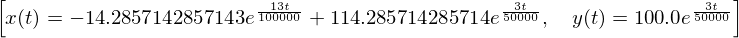

In [4]:
# para condiciones iniciales x(0) = 100, and y(0) = 100
C1, C2 = symbols("C1, C2")
const = solve([sol[0].rhs.subs(t,0)-100, sol[1].rhs.subs(t, 0)-100], [C1,C2])
sol2=[0,0]
sol2[0]=simplify(sol[0].rhs.subs(C1, const[C1]).subs(C2, const[C2]))
sol2[1]=simplify(sol[1].rhs.subs(C1, const[C1]).subs(C2, const[C2]))
sol3=[Eq(x(t),sol2[0]),Eq(y(t),sol2[1])]
X = np.vectorize(lambda val: sol2[0].subs(t, val).evalf())
Y = np.vectorize(lambda val: sol2[1].subs(t, val).evalf())
sol3

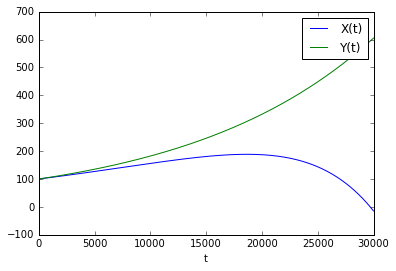

In [5]:
T = np.linspace(0,30000,5000)
plt.plot(T, X(T))
plt.plot(T, Y(T))
plt.legend(("X(t)", "Y(t)"))
plt.xlabel("t")

#### Solución numérica

In [6]:
def yut(y, t, a1, a2, c1, c2):
        x1, x2 = y
        dydt = [a1*x1-c1*x2,a2*x2-c2*x1]
        return dydt
    
a1=0.00013
a2=0.00013
c1=0.00008
c2=0.00007

y0 = [100.0, 100.0]
T2 = np.linspace(0,22500,5000)
sol = odeint(yut, y0, T2, args=(a1, a2, c1, c2))
s1=sol[:,0]
s2=sol[:,1]
#a=s1<0;
#s1[a]=0;

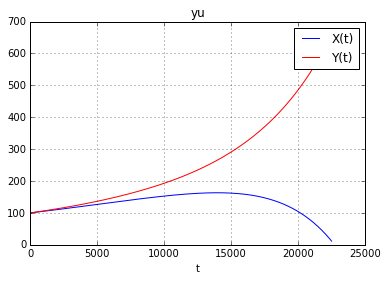

In [7]:
plt.plot(T2, s1, color="blue")
plt.plot(T2, s2, color="red")
plt.legend(("X(t)", "Y(t)"))
plt.xlabel("t")
plt.title('yu')
plt.grid(True)

Se observa un comportamiento similar para el análisis simbolico y el análisis númerico, aunque para el análisis numérico se presenta un decrecimiento más rápido para la especie X

### Sistema de ecuaciones no lineales 

En este caso las especies ya no se relacionarán de forma lineal dado que se incluirán terminos como $x(t)^2$, $y(t)^2$ y $x(t)*y(t)$ que significan la lucha entre elementos de la misma especie, la lucha entre elementos de especies diferentes y como esto influye en el crecimiento o decremiento de la población. Las ecuaciones son las siguientes:

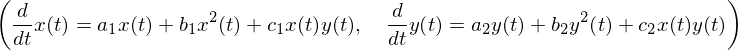

In [8]:
x= Function("x",real=True)
y= Function("y",real=True)
a1,a2,b1,b2,c1,c2,t=symbols("a1 a2 b1 b2 c1 c2 t",real=True)
eq = (Eq(Derivative(x(t),t),a1*x(t)+b1*x(t)**2+c1*x(t)*y(t)), Eq(Derivative(y(t),t),a2*y(t)+b2*y(t)**2+c2*x(t)*y(t)))
eq

#### Solución simbólica

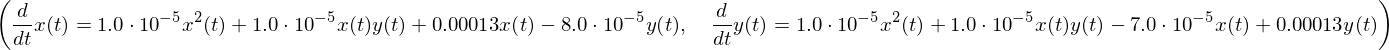

In [9]:
eq = (Eq(Derivative(x(t),t),0.00013*x(t)-0.00008*y(t)+0.00001*x(t)**2+0.00001*x(t)*y(t)), Eq(Derivative(y(t),t),0.00013*y(t)-0.00007*x(t)+0.00001*x(t)**2+0.00001*x(t)*y(t)))
#sol = dsolve(eq)
#sol
eq

#### Solución numérica

In [10]:
def yut(y, t, a1, a2, b1, b2, c1, c2, d1, d2):
        x1, x2 = y
        dydt = [a1*x1+b1*x2+c1*x1*x1+d1*x1*x2,a2*x2+b2*x1+c2*x2*x2+d2*x1*x2]
        return dydt
    
a1=0.00013
a2=0.00013
b1=-0.0001
b2=-0.0001
c1=-0.00001
c2=-0.00002
d1=-0.00002
d2=-0.00002

y0 = [100.0, 100.0]
T2 = np.linspace(0,20000,100)
sol = odeint(yut, y0, T2, args=(a1, a2, b1, b2, c1, c2, d1, d2))
s1=sol[:,0]
s2=sol[:,1]



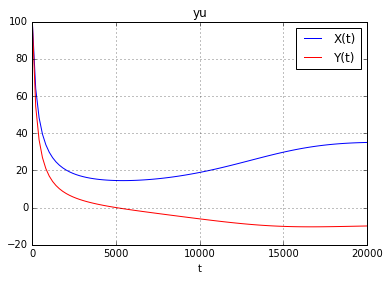

In [11]:
plt.plot(T2, s1, color="blue")
plt.plot(T2, s2, color="red")

plt.legend(("X(t)", "Y(t)"))
plt.xlabel("t")
plt.title('yu')
plt.grid(True)

### Caso Resonancia
Acontinución se ilustrará el caso en el que estimula un sistema a la frecuencia natural del mismo y se presenta un fenomeno que se conoce como resonancia

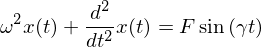

In [12]:
g, w, F=symbols("\\gamma \\omega F")
Eq(Derivative(x(t),t,t)+w**2*x(t),F*sin(g*t))


En el caso en el que el valor de $\gamma$ y $\omega$ se acercan se presenta un fenomeno llamado Resonancia, en este caso vamos a suponer los valores $\gamma=1$, $\omega=1$ y $F=1$ y a resolver la ecuación diferencial para las condiciones iniciales $x(t)=0$ y $\frac{dx}{dt}=0$

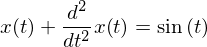

In [13]:
Eq4=Eq(Derivative(x(t),t,t)+x(t),sin(t))
Eq4

### Solución simbólica

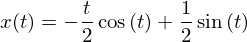

In [14]:
a=dsolve(Eq4)
C1, C2 = symbols("C1, C2")
const = solve([a.rhs.subs(t,0), a.rhs.diff(t).subs(t, 0)], [C1,C2])
a2=simplify(a.rhs.subs(C1, const[C1]).subs(C2, const[C2]))
A = np.vectorize(lambda val: a2.subs(t, val).evalf())
Eq(x(t),a2)

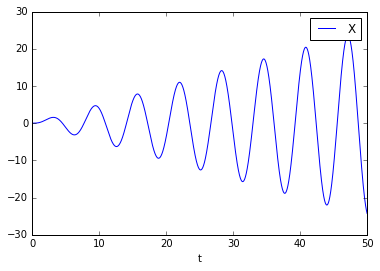

In [15]:
T = np.linspace(0,50,5000)
plt.plot(T, A(T))
plt.legend(("X(t)"))
plt.xlabel("t")

In [25]:
T = np.linspace(0,50,200)
a10=np.linspace(0.2,0.9999,10)
Eq_yu=range(len(a10))
vectors=range(len(a10))
b=0
for x10 in a10:
    Eq_yu[b]=Eq(Derivative(x(t),t,t)+x(t),sin((x10)*t))
    a=dsolve(Eq_yu[b])
    C1, C2 = symbols("C1, C2")
    const = solve([a.rhs.subs(t,0), a.rhs.diff(t).subs(t, 0)], [C1,C2])
    a2=simplify(a.rhs.subs(C1, const[C1]).subs(C2, const[C2]))
    A = np.vectorize(lambda val: a2.subs(t, val).evalf())
    vectors[b]=A(T)
    b=b+1
    

    

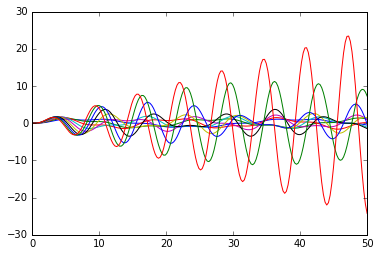

In [26]:
for x13 in vectors:
    plt.plot(T,x13)

### Use Git and nbviewer for publishing and sharing notebooks online.
Notebook y la presentación en el siguiente [link](http://nbviewer.jupyter.org/gist/yuberku/b0548115ac1048597dff9257bb8fa5bb)

Notebook de creación de las animaciones en el siguiente [link](http://nbviewer.jupyter.org/gist/yuberku/ea42fa8badd838b2c999340459217e4f)